In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/sales_train.csv')

test = pd.read_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/test.csv')


In [3]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['dayofweek'] = train['date'].dt.dayofweek
train['dayofmonth'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['quarter'] = train['date'].dt.quarter
train['year'] = train['date'].dt.year
train['minute'] = train['date'].dt.minute
train['hour'] = train['date'].dt.hour

Text(0,0.5,'number of items sold')

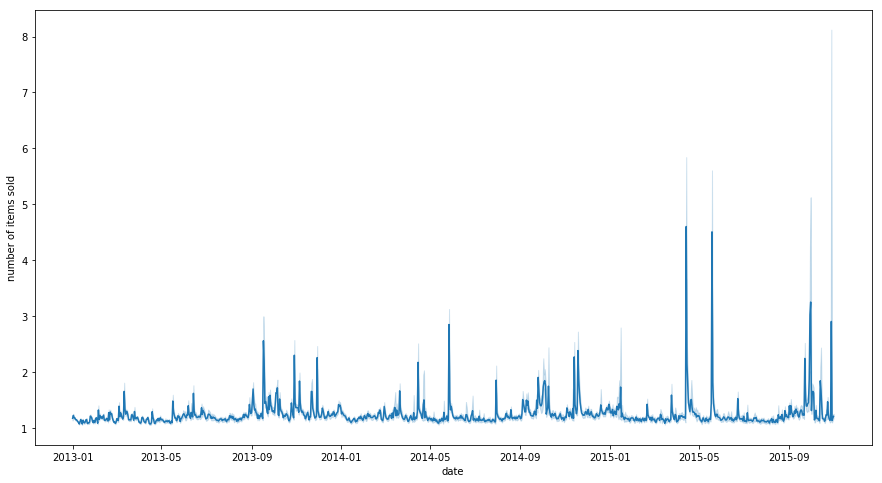

In [6]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x = 'date', y = 'item_cnt_day', data = train)
plt.xlabel("date")
plt.ylabel('number of items sold')


In [7]:
sold_over_10 = train.loc[train['item_cnt_day'] > 10]

Text(0,0.5,'number of items sold')

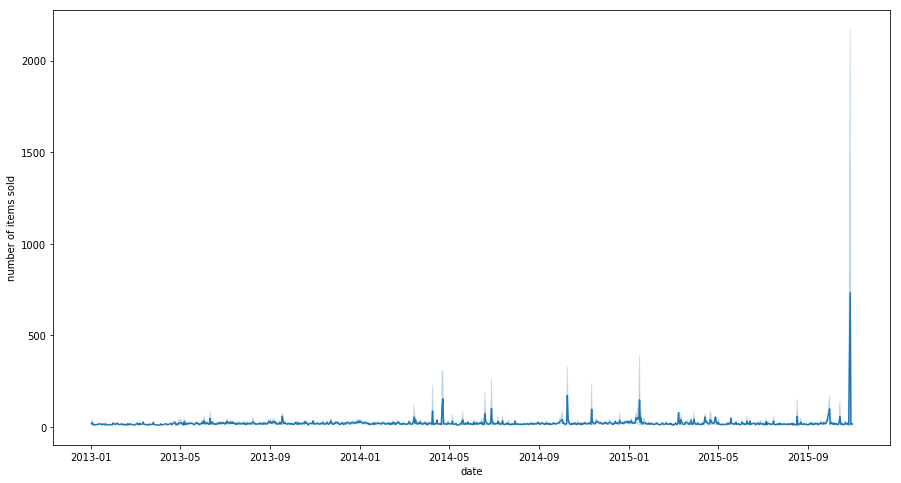

In [8]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x = 'date', y = 'item_cnt_day', data = sold_over_10)
plt.xlabel("date")
plt.ylabel('number of items sold')


In [9]:
train['total_sales'] = train['item_price'] * train['item_cnt_day']

In [10]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dayofweek,dayofmonth,month,quarter,year,minute,hour,total_sales
0,2013-01-02,0,59,22154,999.00,1.0,2,2,1,1,2013,0,0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,3,3,1,1,2013,0,0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,5,5,1,1,2013,0,0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,6,6,1,1,2013,0,0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1,15,1,1,2013,0,0,1099.00


In [11]:
dfs = []
for y in train['year'].unique():
    for m in train['month'].unique():
        df = pd.DataFrame(train.loc[(train['year'] == y) & (train['month'] == m)]
                          .groupby(['shop_id', 'item_id'])['total_sales'].sum())
        df = df.rename(index=str, columns={'total_sales': 'total_sales-'+ str(m) + '-' + str(y)})
        df.reset_index(inplace=True)
        dfs.append(df)

In [12]:
train_total = dfs[0]
for df in dfs[1:]:
    train_total =  pd.merge(train_total, df, how='outer', on=['shop_id', 'item_id'])

In [13]:
train_total.head()

,shop_id,item_id,total_sales-1-2013,total_sales-2-2013,total_sales-3-2013,total_sales-4-2013,total_sales-5-2013,total_sales-6-2013,total_sales-7-2013,total_sales-8-2013,...,total_sales-3-2015,total_sales-4-2015,total_sales-5-2015,total_sales-6-2015,total_sales-7-2015,total_sales-8-2015,total_sales-9-2015,total_sales-10-2015,total_sales-11-2015,total_sales-12-2015
0,0,32,1326.0,2210.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,33,1041.0,1041.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,35,247.0,3458.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,43,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,51,257.0,381.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
train_total.to_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/train_total.csv', index = False)

In [15]:
train.to_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/sales_train.csv', index = False)